In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
# Setting 

results_dir = './interp_metrics'
classifier = 'lstm' # cnn, lstm
dataset = 'ECG5000' # ECG200, ECG5000, Epilepsy

# LSTM settings
if classifier == 'cnn':
    model_name = f'cnn_{dataset}'
else:
    hidden_size=10
    rnn=0.1
    model_name = f'lstm_{dataset}_h{hidden_size}_drop{rnn}'

    if dataset == 'Epilepsy':
        model_name = 'lstm_Epilepsy_h200_drop0.3_acc58'


# Interpretability Results

In [244]:
metrics = {
    'CF': 'Counterfactual',
    'faith': 'Faithfulness',
    'reliability': 'Reliability'
    }

## 1. Counterfactual

Calculates the L0, L1, L2, and L-infty distance measures between truth and counterfactual

1. d1 = L0 distance
2. d2 = L1 distance
3. d3 = L2 distance
4. d4 = L-infinity 

**Note**:

Only valid for counterfactual methods i.e. how close is counterfactual

In [278]:
# 
my_model = 'lstm'
datasets_name = ['ECG200','ECG5000','Epilepsy']
cf_df = pd.DataFrame()
for d in datasets_name:
    if my_model == 'cnn':
        model_name = f'cnn_{d}'
    else:
        model_name = f'lstm_{d}_h10_drop0.1'
        if d=='Epilepsy':
            model_name = 'lstm_Epilepsy_h200_drop0.3_acc58'
    metrics_df = pd.read_csv(f'{results_dir}/{model_name}_CF.csv')
    metrics_df['method'] = metrics_df['method'].fillna('TSEvo')
    metrics_df['dataset'] = d
    metrics_df = metrics_df[metrics_df['method']=='TSEvo']
    cf_df = pd.concat([metrics_df,cf_df])



metrics_df = cf_df
metrics_df

,d1_mean,d2_mean,d3_mean,d4_mean,validty_mean,d1_std,d2_std,d3_std,d4_std,validty_std,method,normalize,tsr,transformer,epochs,dataset
2,0.998382,0.874167,773.046050,3.550000,1.0,0.002288,0.040424,67.197135,0.084853,0.0,TSEvo,NaN,NaN,authentic_opposing_information,30.0,Epilepsy
3,1.000000,0.436043,99.945572,3.557699,1.0,0.000000,0.248967,68.377832,1.548645,0.0,TSEvo,NaN,NaN,authentic_opposing_information,30.0,ECG5000
3,1.000000,0.153109,12.164499,1.587792,1.0,0.000000,0.103266,8.624151,0.580677,0.0,TSEvo,NaN,NaN,authentic_opposing_information,30.0,ECG200


<Figure size 640x480 with 0 Axes>

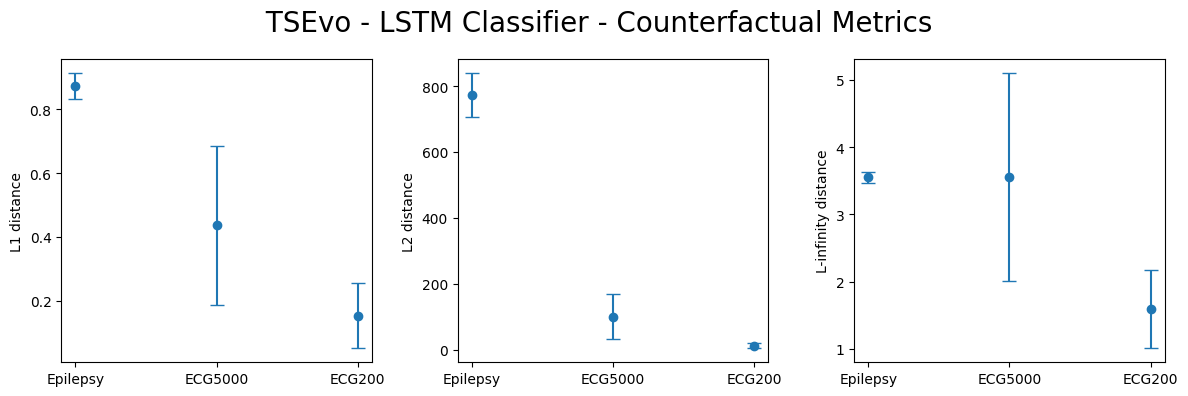

In [279]:
fig=plt.figure()
fig, axs = plt.subplots(1, 3, figsize=(12, 4))


x = metrics_df['dataset']
y = metrics_df['d2_mean']
e = metrics_df['d2_std']

axs[0].errorbar(x,y,e, linestyle='None', marker='o', capsize=5)
axs[0].set_ylabel('L1 distance')


x = metrics_df['dataset']
y = metrics_df['d3_mean']
e = metrics_df['d3_std']

axs[1].errorbar(x,y,e, linestyle='None', marker='o', capsize=5)
axs[1].set_ylabel('L2 distance')


x = metrics_df['dataset']
y = metrics_df['d4_mean']
e = metrics_df['d4_std']

axs[2].errorbar(x,y,e, linestyle='None', marker='o', capsize=5)
axs[2].set_ylabel('L-infinity distance')

fig.suptitle(f' TSEvo - {my_model.upper()} Classifier - Counterfactual Metrics', fontsize=20)
 
fig.tight_layout()
fig.savefig(f'{results_dir}/tsevo_{my_model}_CF.png')

## 2. Reliability


The metrics in the reliability evaluation from the XTSC-Bench library mean the following:

1. AUC_mean/std: The Area Under the Curve (AUC) score, evaluating the ability of the explanation to localize relevant regions effectively. Higher values indicate better localization.
2. Pointing_mean/std: The pointing game metric measures how accurately the top explanations correspond to the correct regions.
3. Relevance Rank_mean/std: Average rank of features deemed most important by the explanation.
4. Relevance Mass_mean/std: Fraction of importance distributed in the top regions of interest.

In [232]:
metrics_df = pd.read_csv(f'{results_dir}/{model_name}_reliable.csv')
metrics_df

,<quantus.metrics.localisation.auc.AUC object at 0x7fbd021032d0>_mean,Pointing_mean,Relevance Rank_mean,Relevance Mass_mean,AuC_mean,<quantus.metrics.localisation.auc.AUC object at 0x7fbd021032d0>_std,Pointing_std,Relevance Rank_std,Relevance Mass_std,AuC_std,method,normalize,tsr,transformer,epochs
0,0.515505,0.0,0.050000,0.047891,0.515505,0.011344,0.0,0.02357,0.000871,0.011344,GRAD,True,True,NaN,NaN
1,0.511990,0.0,0.033333,0.046066,0.511990,0.030144,0.0,0.04714,0.010573,0.030144,FA,True,True,NaN,NaN
2,0.622194,0.0,0.066667,-0.712406,0.622194,0.000601,0.0,0.00000,0.977226,0.000601,NaN,NaN,NaN,authentic_opposing_information,30.0


In [233]:
metrics_df['method'] = metrics_df['method'].fillna('TSEvo')

<Figure size 640x480 with 0 Axes>

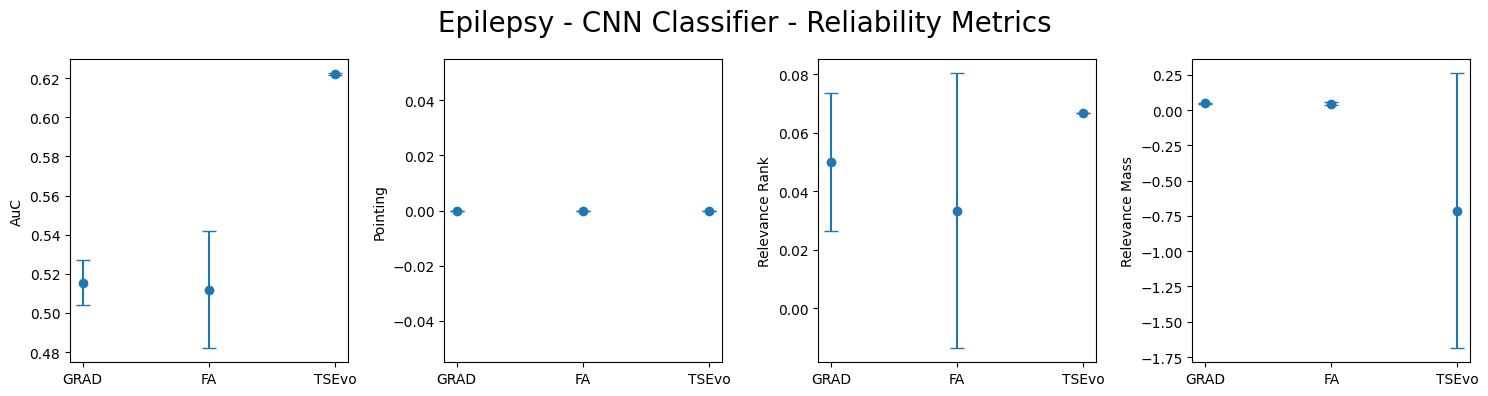

In [234]:


fig=plt.figure()
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

x = metrics_df['method']
y = metrics_df['AuC_mean']
e = metrics_df['AuC_std']

axs[0].errorbar(x,y,e, linestyle='None', marker='o', capsize=5)
axs[0].set_ylabel('AuC')

x = metrics_df['method']
y = metrics_df['Pointing_mean']
e = metrics_df['Pointing_std']

axs[1].errorbar(x,y,e, linestyle='None', marker='o', capsize=5)
axs[1].set_ylabel('Pointing')

x = metrics_df['method']
y = metrics_df['Relevance Rank_mean']
e = metrics_df['Relevance Rank_std']

axs[2].errorbar(x,y,e, linestyle='None', marker='o', capsize=5)
axs[2].set_ylabel('Relevance Rank')


x = metrics_df['method']
y = metrics_df['Relevance Mass_mean']
e = metrics_df['Relevance Mass_std']

axs[3].errorbar(x,y,e, linestyle='None', marker='o', capsize=5)
axs[3].set_ylabel('Relevance Mass')

fig.suptitle(f' {dataset} - {classifier.upper()} Classifier - Reliability Metrics ', fontsize=20)

fig.tight_layout()
fig.savefig(f'{results_dir}/{model_name}_reliability.png')

## 3. Complexity

1. complexity: Average computational complexity or interpretability complexity across samples.
2. Effective Complexity: Measures the effective complexity of the explanation, evaluating the trade-off between explanation fidelity and its simplicity.

In [235]:
metrics_df = pd.read_csv(f'{results_dir}/{model_name}_complexity.csv')
metrics_df

,complexity_mean,<quantus.metrics.complexity.effective_complexity.EffectiveComplexity object at 0x7f89a761b350>_mean,complexity_std,<quantus.metrics.complexity.effective_complexity.EffectiveComplexity object at 0x7f89a761b350>_std,method,normalize,tsr,transformer,epochs
0,5.361227,522.0,0.161484,0.000000,GRAD,True,True,NaN,NaN
1,5.330293,522.0,0.171294,0.000000,FA,True,True,NaN,NaN
2,6.100786,617.0,0.045401,1.414214,NaN,NaN,NaN,authentic_opposing_information,30.0


In [236]:
metrics_df['method'] = metrics_df['method'].fillna('TSEvo')

<Figure size 640x480 with 0 Axes>

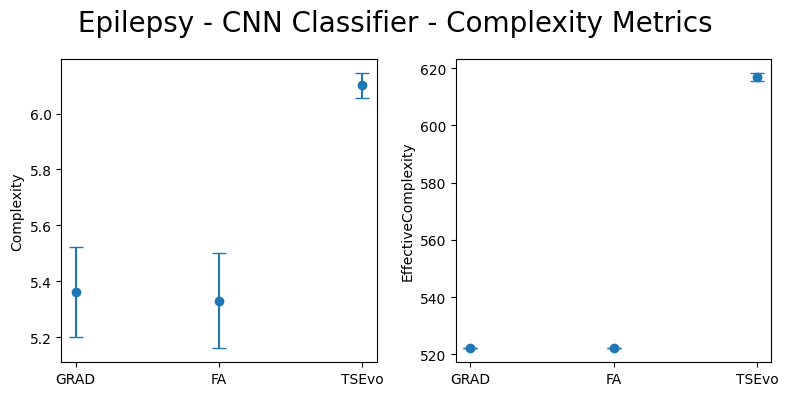

In [237]:
fig=plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

x = metrics_df['method']
y = metrics_df['complexity_mean']
e = metrics_df['complexity_std']

axs[0].errorbar(x,y,e, linestyle='None', marker='o', capsize=5)
axs[0].set_ylabel('Complexity')

x = metrics_df['method']
y = metrics_df.iloc[:,1]
e = metrics_df[metrics_df.iloc[:,1].name.replace('_mean','_std')]

axs[1].errorbar(x,y,e, linestyle='None', marker='o', capsize=5)
axs[1].set_ylabel('EffectiveComplexity')

fig.suptitle(f' {dataset} - {classifier.upper()} Classifier - Complexity Metrics ', fontsize=20)

fig.tight_layout()
fig.savefig(f'{results_dir}/{model_name}_complexity.png')


## 4. Faithfulness


1. monoton_uniform_mean: Measures whether the explanation’s output changes consistently (monotonically) when perturbing features uniformly.
2. faithfulness_correlation_uniform_mean: Correlation between the importance scores and changes in model predictions when features are perturbed uniformly.
3. monoton_mean: Measures monotonicity under a general perturbation scheme.
4. faithfulness_correlation_mean: Correlation between scores and prediction changes under general perturbations.

In [255]:
model_name

'lstm_ECG5000_h10_drop0.1'

In [256]:
metrics_df = pd.read_csv(f'{results_dir}/{model_name}_faith.csv')
metrics_df

,monoton_uniform_mean,faithfulness_correlation_uniform_mean,monoton_mean_mean,faithfulness_correlation_mean_mean,monoton_uniform_std,faithfulness_correlation_uniform_std,monoton_mean_std,faithfulness_correlation_mean_std,method,normalize,tsr,transformer,epochs
0,0.0,-0.321444,1.0,-0.534700,0.0,0.273610,0.0,0.257377,FO,True,True,NaN,NaN
1,0.0,-0.253203,1.0,-0.481273,0.0,0.269802,0.0,0.269687,GRAD,True,True,NaN,NaN
2,0.0,-0.316578,1.0,-0.565640,0.0,0.282786,0.0,0.194629,FA,True,True,NaN,NaN
3,0.0,0.020112,1.0,-0.063823,0.0,0.274597,0.0,0.255317,NaN,NaN,NaN,authentic_opposing_information,30.0


In [257]:
metrics_df['method'] = metrics_df['method'].fillna('TSEvo')

<Figure size 640x480 with 0 Axes>

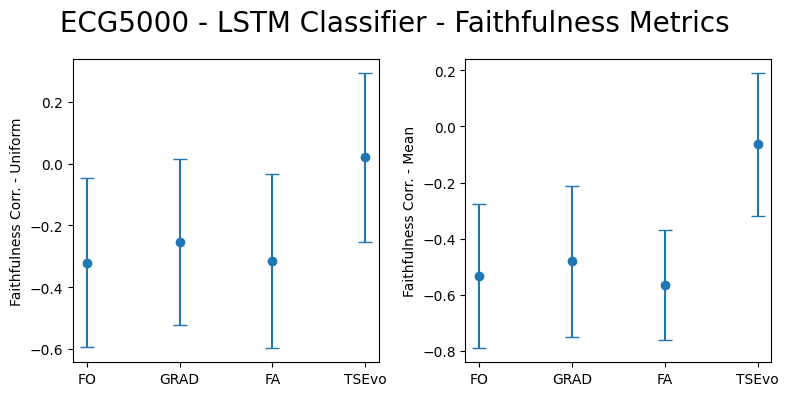

In [258]:
# monoton features are not varying so ignoring

if 'monoton_uniform_mean' in metrics_df.columns:
    fig=plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    x = metrics_df['method']
    y = metrics_df['faithfulness_correlation_uniform_mean']
    e = metrics_df['faithfulness_correlation_uniform_std']

    axs[0].errorbar(x,y,e, linestyle='None', marker='o', capsize=5)
    axs[0].set_ylabel('Faithfulness Corr. - Uniform')

    x = metrics_df['method']
    y = metrics_df['faithfulness_correlation_mean_mean']
    e = metrics_df['faithfulness_correlation_mean_std']

    axs[1].errorbar(x,y,e, linestyle='None', marker='o', capsize=5)
    axs[1].set_ylabel('Faithfulness Corr. - Mean')

    fig.suptitle(f' {dataset} - {classifier.upper()} Classifier - Faithfulness Metrics ', fontsize=20)

    fig.tight_layout()
    fig.savefig(f'{results_dir}/{model_name}_faith.png')

else:
    print(f"Faithfulness metrics not found in csv")